In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2 as cv
import glob
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv
from ipyvtklink.viewer import ViewInteractiveWidget
from itkwidgets import view

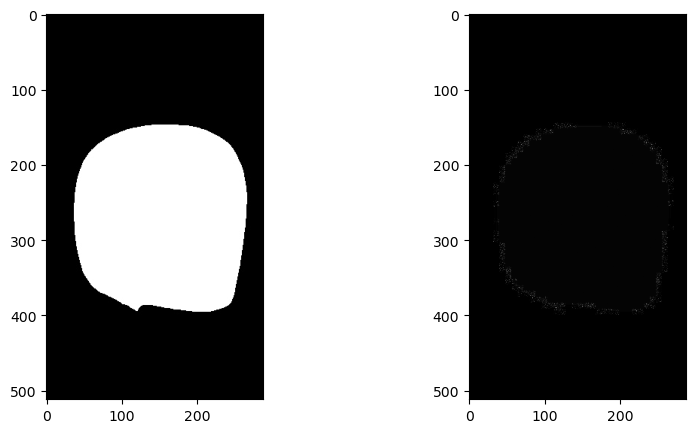

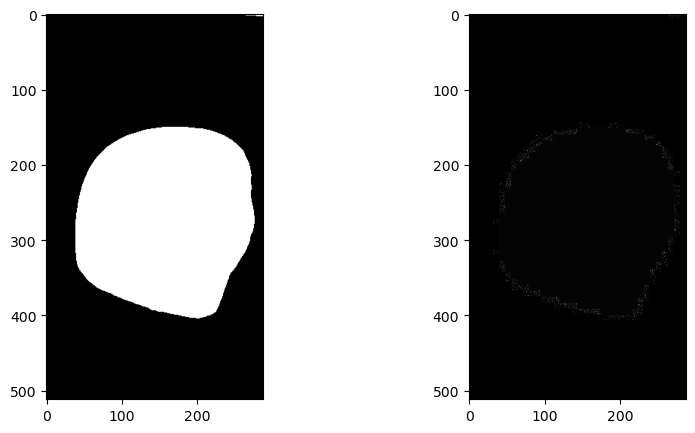

ValueError: Surface level must be within volume data range.

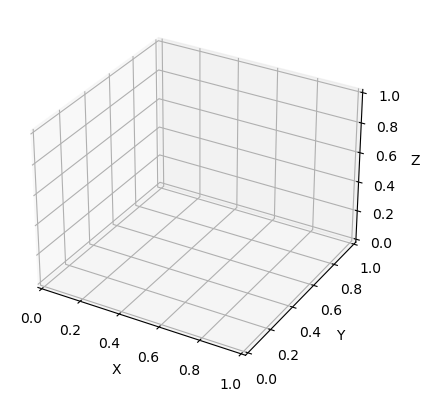

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes

# Configuración inicial
load_images = True
display_volume_corners = False
compute_visual_hull = True
display_volume_slices = False
display_iso_surface = True

silhouette_threshold = 100
bbox = np.array([[0.4, -0.3, -1.8], [2.2, 1.3, 2.7]])  # [minX minY minZ; maxX maxY maxZ]
volume_x = 10
volume_y = 10
volume_z = 20
volume_threshold = 17

num_cameras = 2

# Carga de imágenes y cálculo de siluetas
if load_images:
    Ps = []
    sils = []
    for n in range(num_cameras):
        img = cv.imread(cv.samples.findFile(f'silueta{n+1}.jpg'))
        sil = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sils.append(sil)
        
        # Visualización de las siluetas y las imágenes recortadas por siluetas
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(sil, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) * sil, cmap='gray')
        plt.show()

# Definir transformación de volumen a coordenadas del mundo
T = np.eye(4)
# Aquí puedes agregar la transformación específica que necesitas

if compute_visual_hull:
    # Inicialización del volumen
    volume = np.zeros((volume_x, volume_y, volume_z))
    
    # Computación del casco visual
    # Esta sección necesita una revisión cuidadosa para replicar la lógica específica de tu implementación en MATLAB
    # El bucle siguiente es solo un esqueleto básico
    for n in range(num_cameras):
        for x in range(volume_x):
            for y in range(volume_y):
                for z in range(volume_z):
                    u, v = 0, 0  # Deberías calcular esto correctamente
                    
                    # Verifica si el punto proyectado cae dentro de la silueta
                    if sils[n][v, u] > silhouette_threshold:
                        # Incrementa el valor en el volumen si el punto cae dentro de la silueta
                        volume[x, y, z] += 1

if display_iso_surface:
    # Visualización de la superficie iso
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Uso de la función marching_cubes para obtener la superficie
    verts, faces, _, _ = marching_cubes(volume, level=volume_threshold)
    
    # Dibujar la superficie
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=1)
    plt.show()

In [2]:
%matplotlib widget

In [9]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install itkwidgets

     ---------------------------------------- 3.4/3.4 MB 9.9 MB/s eta 0:00:00
     ------------------------------------- 511.7/511.7 kB 31.3 MB/s eta 0:00:00
     ------------------------------------- 511.6/511.6 kB 31.3 MB/s eta 0:00:00
     --------------------------------------- 36.4/36.4 MB 36.3 MB/s eta 0:00:00
     --------------------------------------- 20.0/20.0 MB 50.4 MB/s eta 0:00:00
     ---------------------------------------- 664.3/664.3 kB ? eta 0:00:00
     ---------------------------------------- 271.6/271.6 kB ? eta 0:00:00
     --------------------------------------- 23.8/23.8 MB 38.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install ipyvtklink

     -------------------------------------- 101.8/101.8 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 124.2/124.2 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 255.7/255.7 kB ? eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:
      Successfully uninstalled widgetsnbextension-3.5.2
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.6.5
    Uninstalling ipywidgets-7.6.5:
      Successfully uninstalled ipywidgets-7.6.5
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install opencv-contrib-python --user

  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pyvista

     ---------------------------------------- 1.9/1.9 MB 15.1 MB/s eta 0:00:00
     --------------------------------------- 52.4/52.4 MB 29.7 MB/s eta 0:00:00
     ---------------------------------------- 63.0/63.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


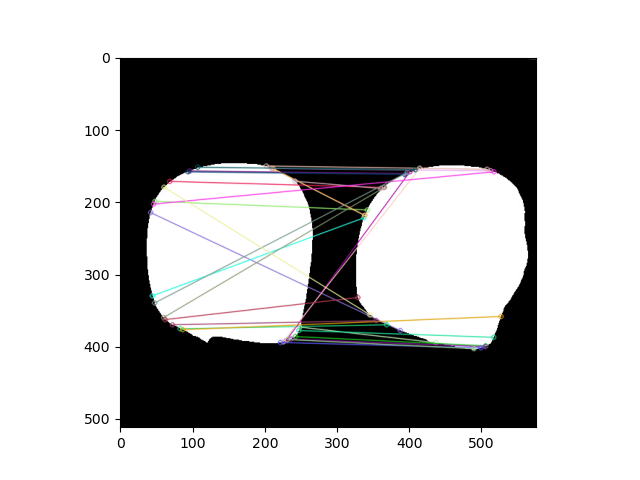

In [3]:
silueta1=cv.imread(cv.samples.findFile('silueta1.jpg'))
silueta2=cv.imread(cv.samples.findFile('silueta2.jpg'))
sil1=cv.cvtColor(silueta1, cv.COLOR_BGR2GRAY)
sil2=cv.cvtColor(silueta2, cv.COLOR_BGR2GRAY)

#ORB es un detector de puntos clave que permite enlazar los puntos que presenten la misma información
orb=cv.ORB_create(nfeatures=1000)
keypoints1,description1=orb.detectAndCompute(silueta1,None)
keypoints2,description2=orb.detectAndCompute(silueta2,None)

bf=cv.BFMatcher_create(cv.NORM_HAMMING,crossCheck=True)
matches=bf.match(description1,description2)
orb_matches= cv.drawMatches(silueta1,keypoints1,silueta2,keypoints2,matches[:500],None,flags=2)
plt.imshow(orb_matches)

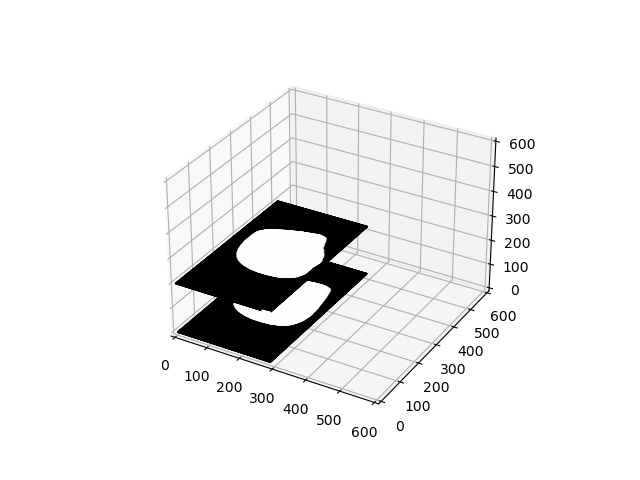

In [14]:
def plot_silhouette_on_plane(ax, silhouette_image, plane='xy', offset=0):
    rows, cols = silhouette_image.shape
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    if plane == 'xy':
        Z = np.full((rows, cols), offset)
    elif plane == 'xz':
        Y, Z = np.full((rows, cols), offset), X.copy()
    elif plane == 'yz':
        X, Z = np.full((rows, cols), offset), Y.T.copy()
    
    # Asegurarse de que las dimensiones de X, Y y Z son correctas después de la manipulación
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))  # Recalcular X, Y para resetear después de manipulaciones
    
    if plane == 'xz':
        X, Z = Z, np.full_like(Z, offset)  # Para 'xz', intercambiar X y Z, y resetear Z al desplazamiento
    elif plane == 'yz':
        Y, Z = Z.T, np.full_like(Z.T, offset)  # Para 'yz', intercambiar Y y Z.T, y resetear Z al desplazamiento
    
    # Asegúrate de que facecolors sea un array 2D que coincida con las formas de X, Y, Z
    facecolors = plt.cm.gray(np.atleast_3d(silhouette_image)[:, :, 0])
    
    # Graficar la superficie
    ax.plot_surface(X, Y, Z, facecolors=facecolors, rstride=1, cstride=1, shade=False)

# Código para demostrar la función aquí...


# Crear figura y eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Suponiendo que 'silhouette1', 'silhouette2' son tus imágenes de siluetas (numpy arrays)
# Para este ejemplo, necesitarías cargar o generar tus imágenes de silueta aquí.
# Ejemplo de carga: silhouette1 = cv2.imread('path_to_your_silhouette_image.png', 0)

# Colocar siluetas en diferentes planos con distintos offsets
plot_silhouette_on_plane(ax, sil1, plane='xy', offset=0)
plot_silhouette_on_plane(ax, sil2, plane='xz', offset=200)

# Configurar límites del eje y mostrar la figura
ax.set_xlim([0, 600])
ax.set_ylim([0, 600])
ax.set_zlim([0, 600])
plt.show()